# If I watch *Inception* then I should also watch *The Matrix*
Yes! This time I will demonstrate recomendation project. We will recommend the movies based on the similarity.

# 

<font size=6><b>T</b></font>his project is devided in 2 notebooks. 
1. EDA (this book)
2. ML Modeling (next book)

I did this intentionally because when I start the project, I want to understand the data first and get comfortable with it. And to get that comfortablility, **EDA** is the best way. My **EDA** will explore the dataset as well as I will demonstrate with variour vizzes so that you can too understand the data.

I will give some time to it to build the 1st notebook and then I will change the gear and will dive to make the ML model which eventually solve the task we want to achieve — ***recommendation***.

There are 2 types of recommendation as we see, 
1. Item based recommendation
        This type will recommend the movies which are similar to what the user has seen.
        Like the example used just above "If I see Inception then I should see The matrix".

2. Collaborative recommendation
        This type will recommend based on what other users like and do watch the movies
        that you like.
        
I don't know which method we are going to follow (maybe we will follow the 2nd method) but for now we will jump right in and load the data up.

Let's go ∞

In [1]:
# Simple imports
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# For string processing
import re

# Temproary import
import os

In [2]:
os.listdir("./DataSource/")[1:-1]

['genome-tags.csv', 'movies.csv', 'ratings.csv', 'Readme-Dataset.html']

We have these ↑ data to cover.
1. Genome-scores.csv
        The tag genome is a data structure that contains 
        tag relevance scores for movies. The structure 
        is a dense matrix: each movie in the genome has
        a value for every tag in the genome.
2. Genome-tags.csv
        The lookup data for genome-scores.csv
3. Movies.csv
        The lookup data, in which every movies are listed
        along with their ID, Genre and Names
4. Ratings.csv
        The actual data to work with. Includes userId, movieId,
        rating, and timestamp as features

###### 

This is **very famous** movielens dataset with 25 Million records.<br>I am getting so eager to analyze it. Let's go.

#### <center> . . . </center>

In [3]:
PATH = "./DataSource/"

###### 

Loading `ratings.csv`

In [4]:
# Will exclude "timestamp" from the data
ratings = pd.read_csv(PATH + "ratings.csv")

In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


###### 

Loading `movies.csv`

In [6]:
movies = pd.read_csv(PATH + "movies.csv")

In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


###### 

Loading `genome-scores.csv`

In [8]:
gnome = pd.read_csv(PATH + "genome-scores.csv")

In [9]:
gnome

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


###### 

Loading `genome-tags.csv`

In [10]:
gnome_lookup = pd.read_csv(PATH + "genome-tags.csv")

In [11]:
gnome_lookup

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


# 

# EDA<br>—

Some checks first to make the analysis smooth.

In [12]:
dup = ratings.duplicated()
dup.sum()

0

In [13]:
ratings[["userId", "movieId"]].duplicated().sum()

0

Means, there are no duplicate rows in the `ratings` data

In [14]:
movies_uniq = ratings.groupby("userId").movieId.apply(lambda movie_ids: movie_ids.is_unique)

In [15]:
movies_uniq.all()

True

Great! This ↑ means that ***there is not a single occurance in which the same user has rated the same movie more than one times***.

###### 

### Things look much clear now!

In [16]:
gnome.sample(5)

,movieId,tagId,relevance
12688734,99114,991,0.04700
15519726,200306,703,0.06975
5129013,5038,1126,0.00975
10925651,66304,972,0.28450
14150684,141166,1053,0.11550


In [17]:
gnome_lookup.sample(5)

,tagId,tag
1105,1106,werewolves
357,358,environmental
336,337,dystopic future
868,869,russian
553,554,interesting


In [18]:
ratings.sample(5)

,userId,movieId,rating,timestamp
17411224,112802,1587,4.0,1527536433
9893929,64228,1265,4.5,1089470841
5117550,33269,4993,4.0,1157518435
4223432,27813,3578,4.0,1225175346
1648410,11004,4016,4.0,1524885952


In [19]:
movies.sample(5)

,movieId,title,genres
53939,188455,306 Hollywood (2018),Documentary
1081,1109,Charm's Incidents (Charms Zwischenfälle) (1996),Drama
48638,177087,The Trail of the Broken Blade (1967),Action|Adventure
49634,179291,The Land of Hope (2012),Drama
30969,137439,Ultimate Betrayal (1994),Drama


Before we move on, we need to do a couple of `dtype checkes` and the na value checks. So, doing just that...

In [20]:
gnome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [21]:
gnome_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [22]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


Dtype looks clean, let's move to the null value checks.

In [24]:
gnome.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [25]:
gnome_lookup.isna().sum()

tagId    0
tag      0
dtype: int64

In [26]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [27]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Cool!

In [28]:
genres_sparse = movies.genres.str.get_dummies("|")
genres_sparse.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

Here, **(no genres listed)** is a type of NULL value, but we can safely work with it as it will not cause any problems.<br>

Cool, the data is clean, so we don't have to do much work on ourselves. Now, we can safely head towards the exploration part where we will extract some insights.

# 

# Q1. How many unique movies are there?

In [29]:
movies.movieId.nunique()

62423

There are total `62423` movies in this dataset and the total ratings on those movies are `25M`. So keep that in mind.

# 

# Q2. Movies released by release year.

*Here we will have to extract some information about the year from the dataset itself*

In [12]:
# This ↓ line will extract the numerical information in the `()`. 
# To make sure the number in the movie title is not being included.
release_year = movies.title.str.extract("\((\d{4})\)")

In [13]:
movies["release_year"] = release_year

**NOTE**: There are total `410` movies, where the release year is not given in the title itself. As it is such a small number *(0.656% of total movies)* we can ignore it for the sake of time. I might have collected the information from web scraping, but I think it is fine for now.

In [14]:
year_freq_counts = movies.release_year.value_counts().sort_index()
how_much_change_units = year_freq_counts.diff()

In [15]:
how_much_change_units.idxmax(), how_much_change_units.max()

('2014', 233.0)

In [21]:
movies.release_year = movies.release_year.astype('category')

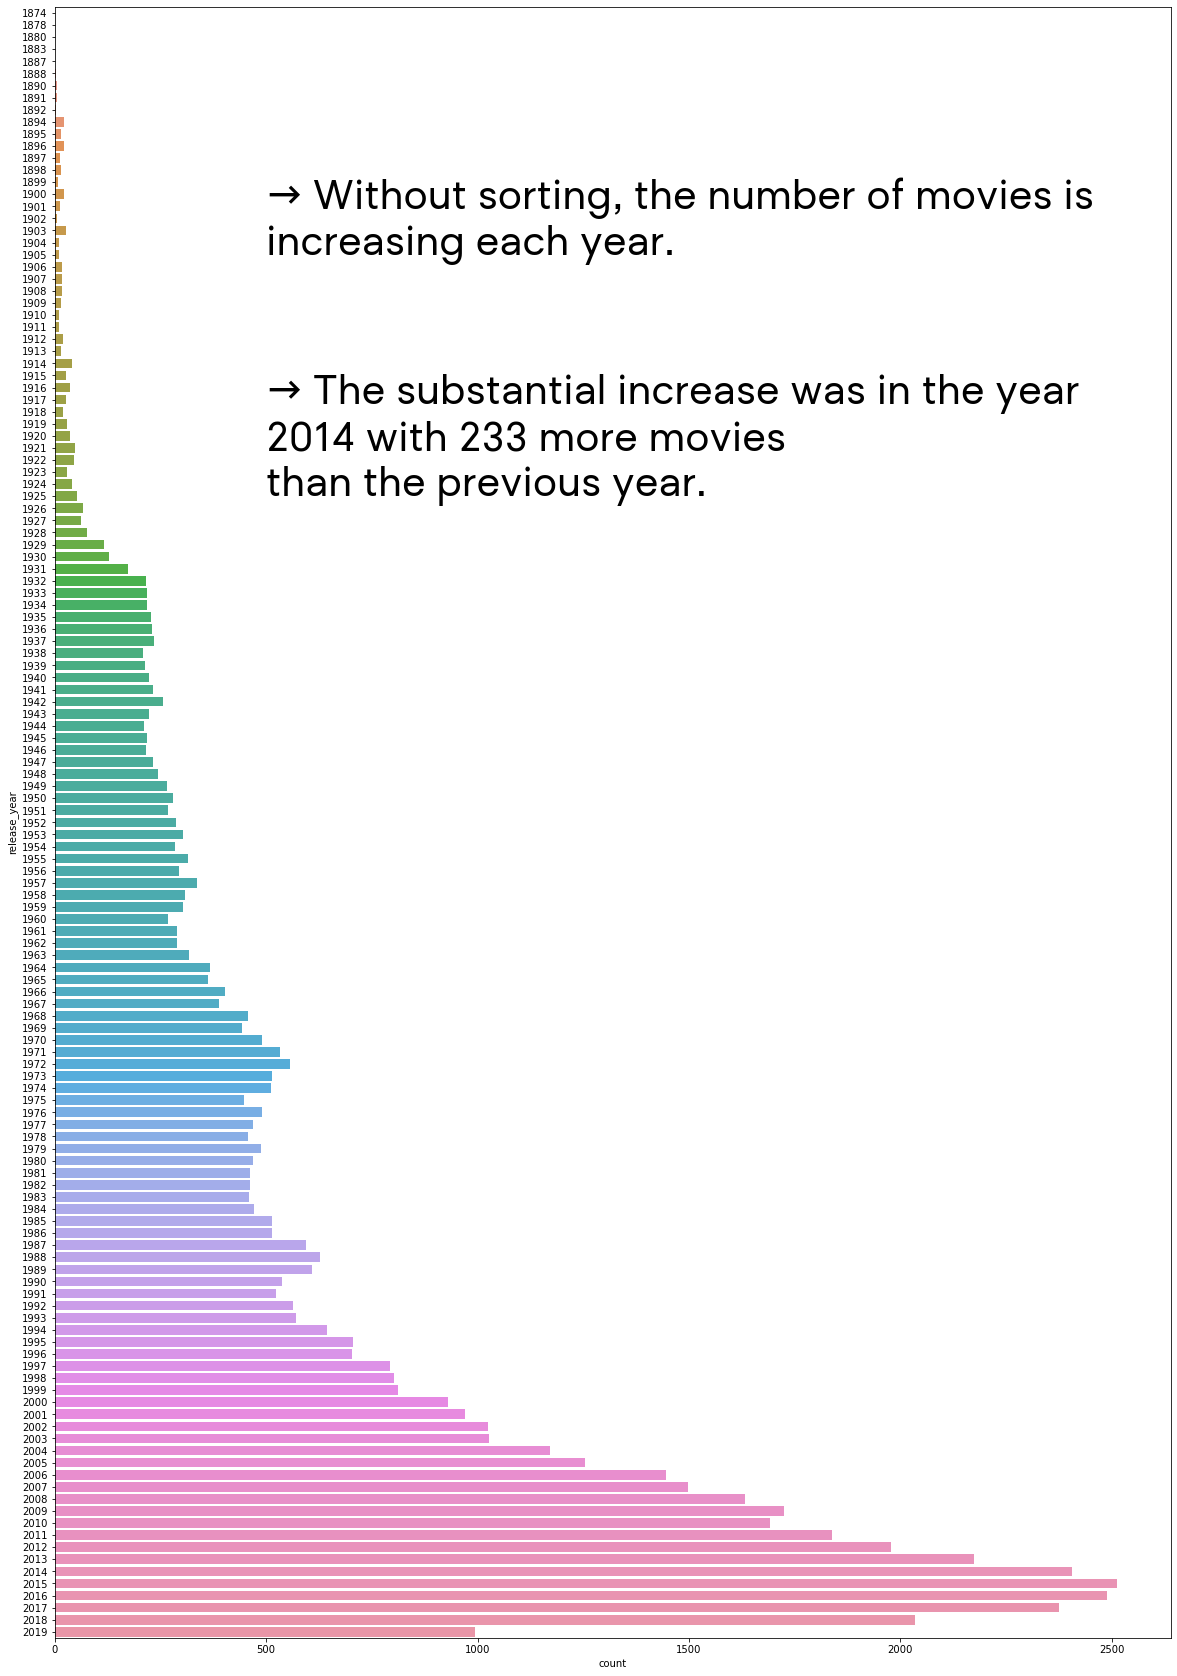

In [22]:
plt.figure(figsize=(20, 30))
sns.countplot(y='release_year', data=movies)
plt.text(500, 20, "→ Without sorting, the number of movies is\nincreasing each year.",
         fontdict={"size":40, "family":"neuville"})

plt.text(500, 40, "→ The substantial increase was in the year \n2014 with 233 more movies\nthan the previous year.",
         fontdict={"size":40, "family":"neuville"});

# 

# Q3. Count of movies by genre

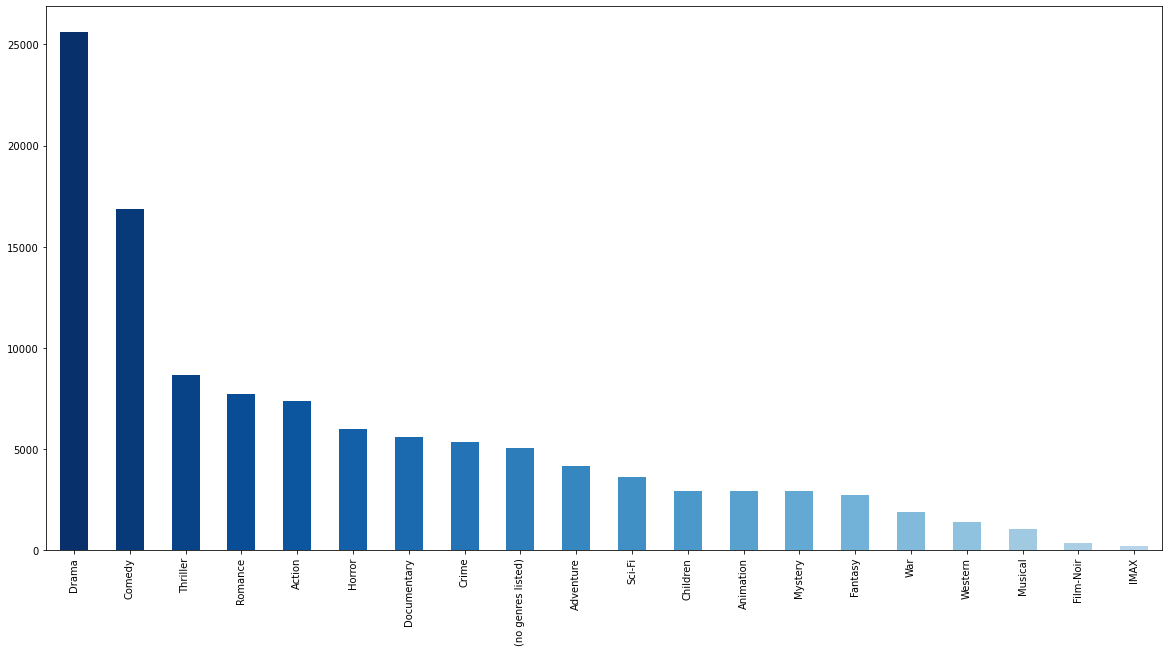

In [35]:
plt.figure(figsize=(20, 10))
genres_sparse.sum(0).sort_values(ascending=False).plot.bar(color=plt.cm.Blues_r(np.linspace(0, .7, len(genres_sparse.columns))));

Evergreen, **Drama** movies are there for the most of the time, followed by **Comedy**, **Thriller** and **Romance** on 2nd, 3rd and 4th place respectively.

This overall picture doesn't tell whole story, we can still see the clear picture of all types of genres by looking at such chart in which the year is given as well.

##### 

### Top 3 year by each genre

In [36]:
# Concating the genre sparse matrix with the year data
year_and_genre = pd.concat([genres_sparse, movies['release_year']], axis=1)

In [37]:
# Melting the dataframe so that we can use the data in appropriate way
melted = year_and_genre.melt(id_vars=["release_year"], var_name="genre", value_name="yes_no")

In [38]:
# Melted data
melted

,release_year,genre,yes_no
0,1995,(no genres listed),0
1,1995,(no genres listed),0
2,1995,(no genres listed),0
3,1995,(no genres listed),0
4,1995,(no genres listed),0
...,...,...,...
1248455,2018,Western,0
1248456,2001,Western,0
1248457,2018,Western,0
1248458,2001,Western,0


In [39]:
see = melted.groupby(["genre", "release_year"], as_index=False)["yes_no"].sum()

# Getting top 3
see = see.groupby("genre").apply(lambda grp: grp.sort_values(by="yes_no", ascending=False).head(3))
see = see.droplevel(1).reset_index(drop=True)
see

,genre,release_year,yes_no
0,(no genres listed),2015,225
1,(no genres listed),2016,201
2,(no genres listed),2014,191
3,Action,2017,261
4,Action,2016,257
5,Action,2014,257
6,Adventure,2015,137
7,Adventure,2014,132
8,Adventure,2016,121
9,Animation,2017,113


Now, our data is in the most appropriate manner. Thus, we can start making the chart to demonstrate our data.

In [40]:
# import plotly.express as px

# df = px.data.tips()
# fig = px.sunburst(see, path=['genre', 'release_year'], values='yes_no')
# fig.show()

<img src="./Sunburst Chart.gif" width="500" align="center">

# 

# Q4. Which combination of genre is most common?

In [41]:
genre_count = movies.genres.str.split("|")
genre_count = pd.concat([genre_count, genre_count.apply(len).rename("count")], axis=1)
genre_count["genres"] = genre_count["genres"].apply(sorted)
genre_count

,genres,count
0,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,"[Adventure, Children, Fantasy]",3
2,"[Comedy, Romance]",2
3,"[Comedy, Drama, Romance]",3
4,[Comedy],1
...,...,...
62418,[Drama],1
62419,[Documentary],1
62420,"[Comedy, Drama]",2
62421,[(no genres listed)],1


In [42]:
genre_count[genre_count["count"] > 1].shape[0]

31792

Right off the bat, we can see that out of 62,423 movies — only 31,792 have multiple genres. Almost half of the movies are having single flavor!

In [43]:
arc = genre_count[genre_count["count"] == 2].genres.astype(str).value_counts()[:20]
arc

['Comedy', 'Drama']          2386
['Drama', 'Romance']         2126
['Comedy', 'Romance']        1577
['Drama', 'Thriller']         933
['Crime', 'Drama']            903
['Horror', 'Thriller']        851
['Drama', 'War']              653
['Action', 'Drama']           536
['Action', 'Thriller']        445
['Comedy', 'Horror']          374
['Action', 'Comedy']          357
['Horror', 'Sci-Fi']          337
['Children', 'Drama']         287
['Animation', 'Children']     284
['Comedy', 'Crime']           280
['Children', 'Comedy']        268
['Crime', 'Thriller']         242
['Adventure', 'Drama']        213
['Action', 'Sci-Fi']          205
['Animation', 'Comedy']       204
Name: genres, dtype: int64

In [44]:
# DON't RUN THIS
# index = list(pd.Series(arc.index).apply(eval).values)
# data = np.c_[index, arc.values]
# pd.DataFrame(data, columns=["source", "destination", "value"]).to_csv("arc.csv", index=False)

By exporting, and using ***THE AMAZING*** open source graph site https://app.rawgraphs.io/, I made the following viz.

<img src="./Arc Combination.png">

Thus, from the graph we can easily see which combinations are mostly used. They are namely: Drama with Romance ot Comedy. Comedy and Romance are the most popular.

# Q5. Count of genre by yeach year.

In [45]:
genre_trend = melted.pivot_table(index="release_year", columns="genre", values="yes_no", aggfunc=sum)
genre_trend

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1874,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1878,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1883,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1887,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,225,243,137,102,121,626,138,359,926,91,0,285,1,2,103,236,160,396,38,14
2016,201,257,121,100,105,622,138,354,891,86,0,261,0,0,109,232,132,414,33,15
2017,166,261,113,113,88,594,143,331,864,85,0,275,0,0,106,195,151,385,40,15


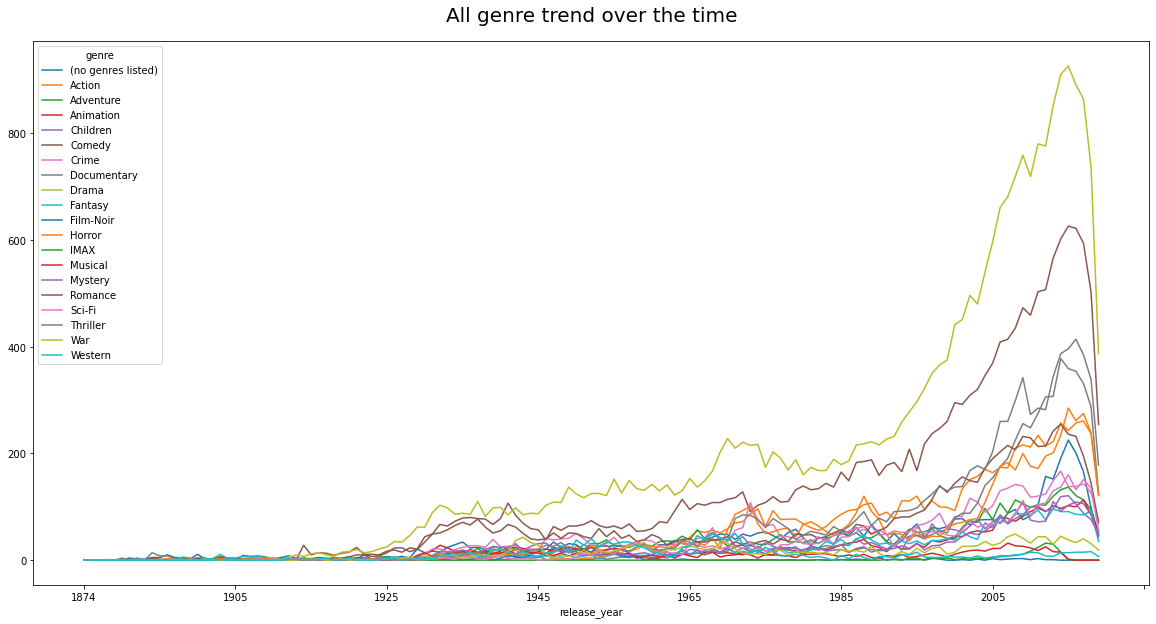

In [46]:
genre_trend.plot(figsize=(20, 10))
plt.title("All genre trend over the time", fontsize=20, pad=20);

I know, it would be much better to plot with plotly or tableau so that we can see the individual trend, but here if we try to plot a couple of genres: Like evolution of IMAX, Horror, Sci-Fi, Action and War

In [47]:
genre_trend.index = genre_trend.index.astype(int)

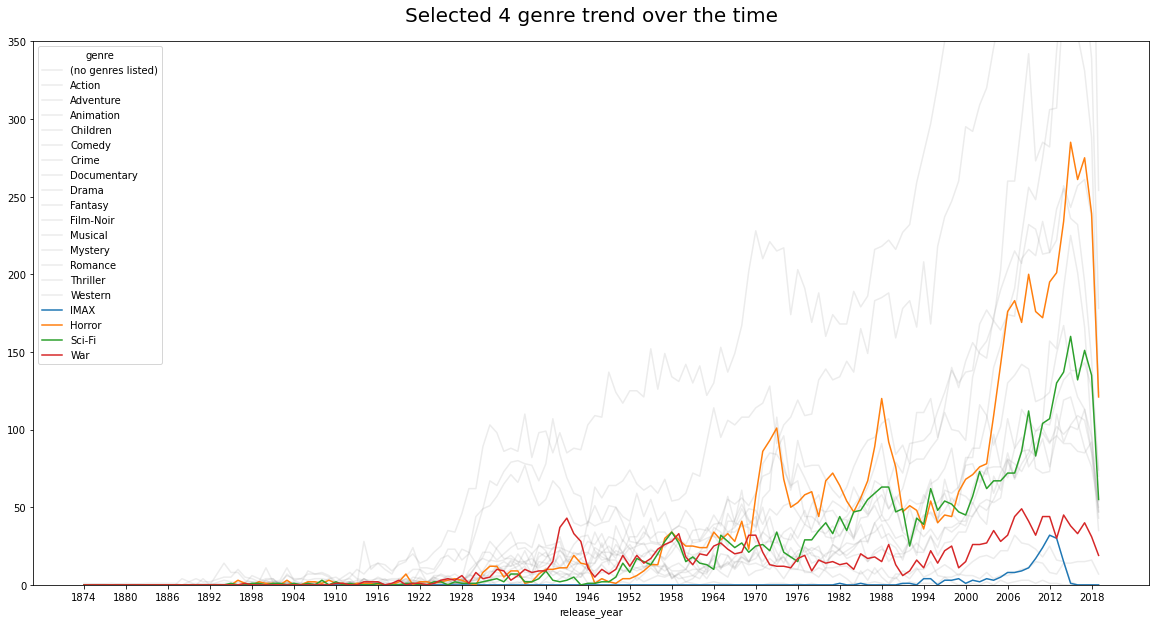

In [48]:
to_select = ["IMAX", "Horror", "Sci-Fi", "War"]
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

genre_trend.drop(to_select, axis=1).plot(color="grey", ax=ax, alpha=0.15)
genre_trend[to_select].plot(ax=ax)
plt.title("Selected 4 genre trend over the time", fontsize=20, pad=20)
plt.xticks(range(1874, 2020, 6))
plt.ylim([0, 350]);

- As we can see, here are a couple of trend for the specific genre like - we can see other genres like IMAX, Horror and other are not in trend before the era of 1970 but except one - `war`. It is understandable that during the WW2 time movies were filmed the most on war.
- The movies on war in those time were: 
    - Great Dictator, The (1940)
    - Best Years of Our Lives, The (1946)
    - Great Guns (1941)
- There are many ups and downs for the horror movies. Probably they come not regularly as other movies do but the horror movies trend has grown like other genres (drama, comedy etc).
- IMAX has been in the focus after 2006 and was at peak around 2012-2014 (remember Intersteller came in 2014?)


##### The calculation for the *wartime* movies (for reference) ↓

In [49]:
temp = movies[(movies["release_year"].astype(float) >= 1940) 
       & (movies["release_year"].astype(float) <= 1948) 
       & (movies["genres"].str.contains("War"))]

merged = pd.merge(temp, ratings)
rating = merged.groupby("movieId").rating.mean()
movies[movies.movieId.isin(rating.sort_values(ascending=False)[:5].index)]

,movieId,title,genres,release_year
1248,1281,"Great Dictator, The (1940)",Comedy|Drama|War,1940
1850,1939,"Best Years of Our Lives, The (1946)",Drama|War,1946
22612,115779,Great Guns (1941),Comedy|Romance|War,1941
39048,156305,Keep 'Em Flying (1941),Comedy|War,1941
46206,171973,"In the Meantime, Darling (1944)",Comedy|War,1944


# 

# Q6. Years in which the highest / lowest amount of movies released.

For this curosity, I will divide the years in decades. Like 70s, 90s etc. And then we will select the highest / lowest movie released year per decade.

In [50]:
prefix = movies["release_year"].str[:-2]
postfix = movies["release_year"].str[-2] + '0'

In [51]:
decade = prefix + postfix
decade = decade.rename("decade")

In [52]:
decade_wise = pd.concat([movies["release_year"], decade], axis=1)

In [53]:
decade_wise.sample(5)

,release_year,decade
16384,1943,1940
13609,2007,2000
37369,1992,1990
1724,1998,1990
33403,2015,2010


> Since we have the data from 1870s, we can't truncate the decade to "70s" because it will make confusion whether it is from 1870s' 70 or 1970s' 70. Thus we will append the prefix too.

We are going right, now let's get most frequent year in the decade.

In [54]:
def high_low(df):
    counts = df["release_year"].value_counts()
    high = counts[[0]]
    low = counts[[-1]]
    
    high_year = high.index[0]
    high_count = high.values[0]
    
    low_year = low.index[0]
    low_count = low.values[0]
    
    return pd.Series([high_count, low_count, high_year, low_year],
                     index=['high', 'low', 'h_year', 'l_year'])

In [55]:
counts = decade_wise.groupby('decade').apply(high_low)
counts

,high,low,h_year,l_year
decade,,,,
1870,1,1,1874,1878
1880,4,1,1888,1883
1890,22,3,1896,1892
1900,26,6,1903,1902
1910,42,11,1914,1910
1920,117,30,1929,1923
1930,235,129,1937,1930
1940,266,212,1949,1944
1950,336,268,1957,1951


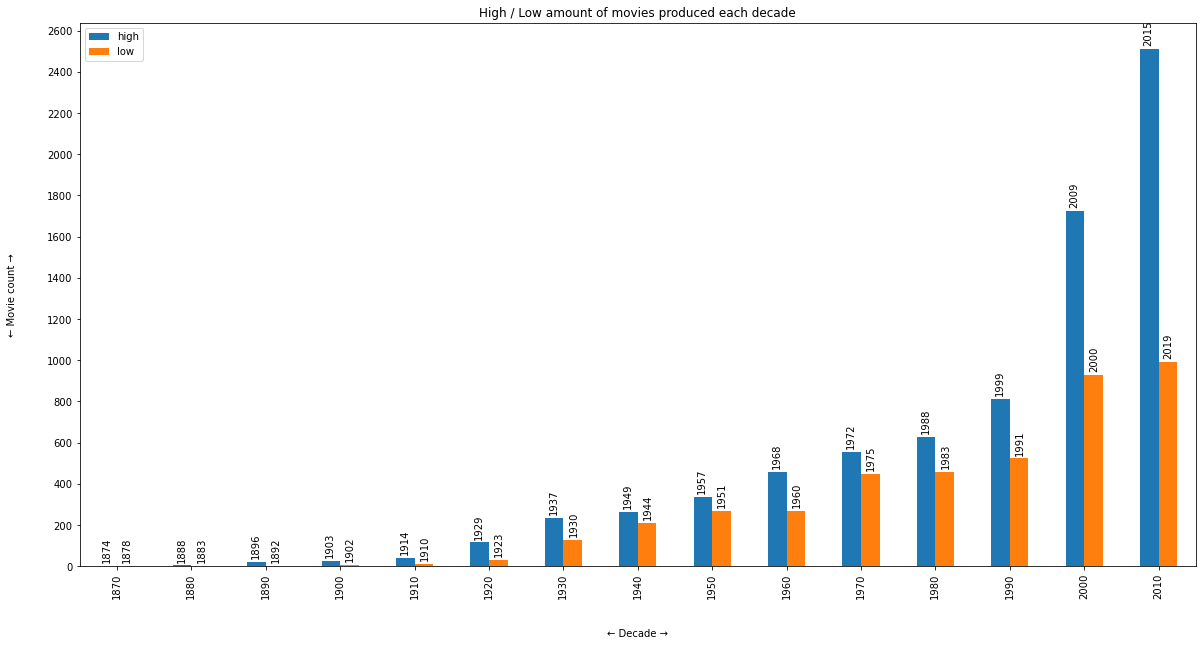

In [56]:
plt.figure(figsize=(20, 10))
ax = plt.axes()
counts[['high', 'low']].plot(kind='bar', ax=ax)

plt.title('High / Low amount of movies produced each decade')
plt.xlabel('← Decade →', labelpad=30)
plt.ylabel('← Movie count →', labelpad=30)

for idx, (h, l) in zip(range(counts.shape[0]), counts[['high', 'low']].values):
    plt.text(idx - .2, h + 25, counts.iloc[idx]['h_year'],
             rotation=90)
    plt.text(idx + .07, l + 25, counts.iloc[idx]['l_year'],
             rotation=90)
    
plt.yticks(range(0, 2700, 200));

Great, Great!<br>
The data needed to be in the compact form — just in the right form to make it work. Now, we have seen the highest / lowest movie producing years, let's look at another interesting finding from this data.

# 

# Q7. The trend of genre 

This is already done in the Q5. But this time I thought that I should use some interactive viz, so I am heading over to the tableau and creting it over there.

# 

# Q8. Movies from which genre are rated more? 

In [57]:
genres_with_year_id = pd.concat([genres_sparse, movies["movieId"], movies["release_year"]], axis=1)

In [58]:
melted_all = genres_with_year_id.melt(id_vars=['movieId', 'release_year'],
                                      var_name='genre',
                                      value_name='yes_no')

In [59]:
melted_all.sample(5)

,movieId,release_year,genre,yes_no
297007,174261,1909,Children,0
1108141,173505,1980,Thriller,1
836869,123575,1971,Musical,0
990957,189973,1970,Romance,0
901942,130732,1971,Mystery,0


In [60]:
rating_by_genre_all = {}

for genre in melted_all.genre.unique():
    filter_ = (melted_all.genre == genre) & (melted_all.yes_no == 1)
    filtered = melted_all[filter_]
    
    movie_ratings_meaned = ratings.groupby('movieId')['rating'].agg(['mean', 'std'])
    rating_by_genre = filtered.merge(movie_ratings_meaned, right_index=True, left_on='movieId')
    rating_by_genre_all[genre] = {}
    rating_by_genre_all[genre]['rating'] = rating_by_genre['mean'].mean()
    rating_by_genre_all[genre]['std'] = rating_by_genre['std'].mean()
    
    del filtered, rating_by_genre, movie_ratings_meaned

In [61]:
rating = pd.DataFrame(rating_by_genre_all).T
rating = rating.sort_values(by="rating")
rating

,rating,std
Horror,2.650740,1.042514
Sci-Fi,2.760530,1.033242
Action,2.926390,0.993986
Thriller,2.944456,0.974609
Adventure,3.011600,1.002376
Fantasy,3.020801,1.036176
Western,3.025755,0.896620
Children,3.033051,1.079193
Comedy,3.041878,0.972837
Mystery,3.045787,0.945276


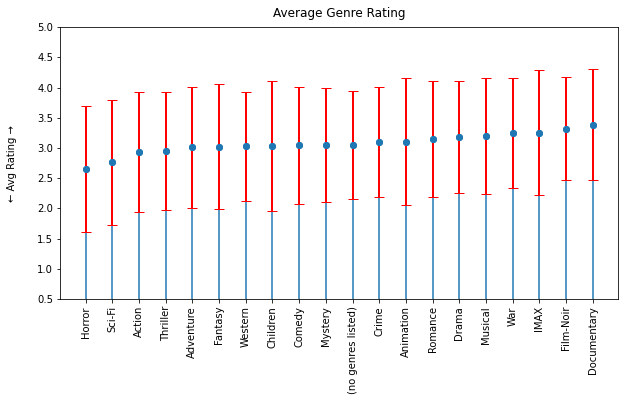

In [62]:
fig = plt.figure(figsize=(10, 5))
plt.stem(rating.index, rating["rating"])

eb = plt.errorbar(rating.index, rating["rating"], 
            yerr=rating["std"],
            fmt='o', ecolor='r', elinewidth=2, capsize=5)

plt.ylim([0.5, 5])
plt.xticks(rotation=90)
plt.title('Average Genre Rating', pad=10)
plt.ylabel('← Avg Rating →', labelpad=20);

**NOTE**: Here, as movies are having the genre in **mix** form, the ratings are repeated here. Means, if movie A has genre `x|y` and movie B has genre `x` then the rating for genre `x` will come from movie A and B while for genre `y`, the movie rating will come from only movie A.

So, <br>
From the chart above, we can see that over the years - Horror movies are rated least and the documentry are rated the most on average. 

The redline shows the standard deviation of the ratings, it is plotted because we can see how confident can we be about the mean ratings.

# 

# Q9. Top 10 most / least voted movies

In [63]:
most_least = ratings.groupby('movieId').size()

In [64]:
most_least = most_least.sort_values(ascending=False)
top10 = most_least[:10].rename("top10")
bottom10 = most_least[most_least <= 100].sample(10, random_state=2).rename("bottom10")

In [65]:
top10 = pd.merge(top10, movies, left_index=True, right_on="movieId")
bottom10 = pd.merge(bottom10, movies, left_index=True, right_on="movieId")

In [66]:
bottom10 = bottom10.sort_values(by="bottom10", ascending=False)

In [67]:
top10

,top10,movieId,title,genres,release_year
351,81491,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
314,81482,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994
292,79672,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
585,74127,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
2480,72674,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
257,68717,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977
475,64144,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993
522,60411,527,Schindler's List (1993),Drama|War,1993
108,59184,110,Braveheart (1995),Action|Drama|War,1995
2867,58773,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1999


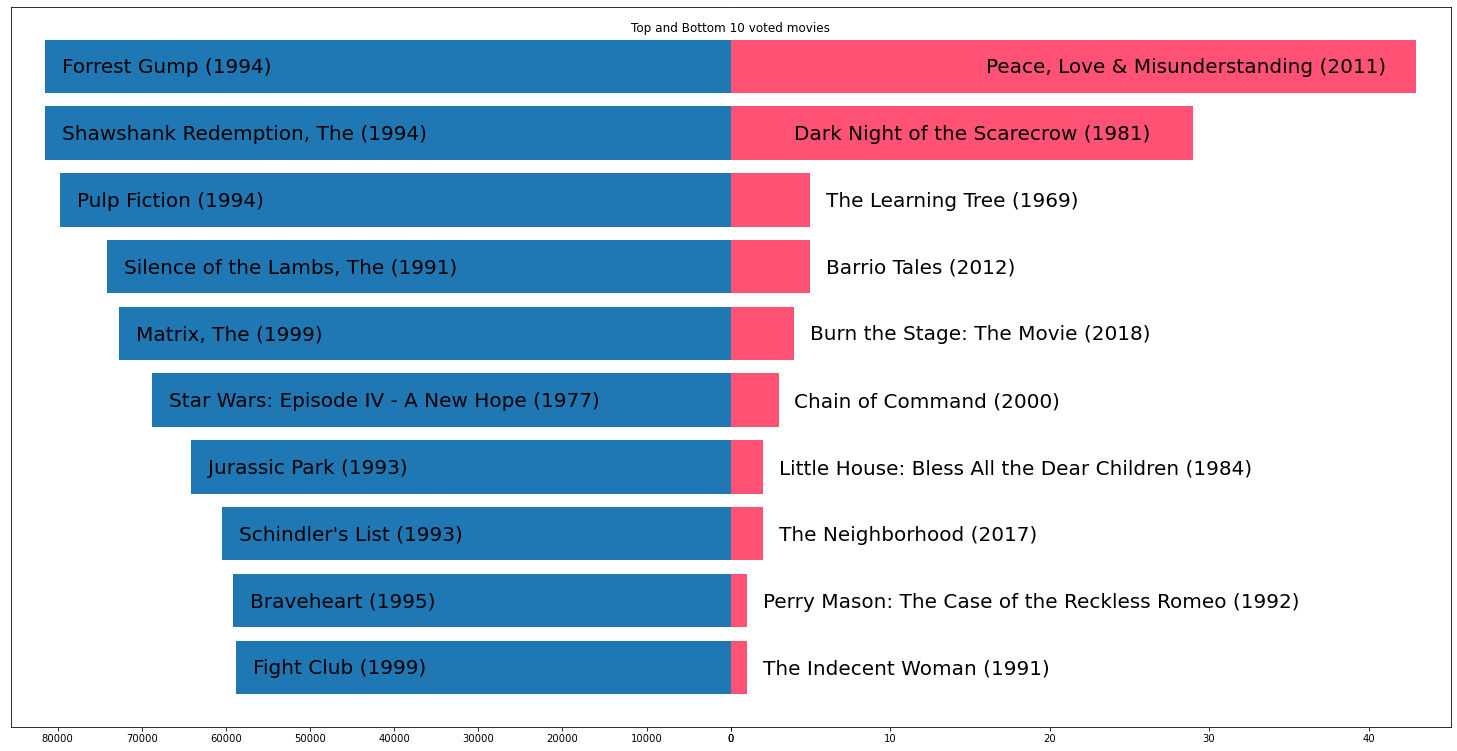

In [72]:
fig = plt.figure(figsize=(20, 10))

ax_left = fig.add_axes([0, 0, .5, 1])
ax_right = fig.add_axes([.5, 0, .5, 1])
ax_left.set(yticks=[])
ax_right.set(yticks=[])
ax_left.spines["right"].set_visible(False)
ax_right.spines["left"].set_visible(False)

ax_left.barh(range(10), top10.top10[::-1])
ax_left.invert_xaxis()
ax_right.barh(range(10), bottom10.bottom10[::-1], color='#ff5274')

for y, (name, x) in enumerate(top10[["title", "top10"]].values[::-1]):
    ax_left.text(x - 2000, y - .1, name, size=20)
    
name, x = bottom10[["title", "bottom10"]].values[0]
ax_right.text(x - 27, 8.9, name, size=20)

name, x = bottom10[["title", "bottom10"]].values[1]
ax_right.text(x - 25, 7.9, name, size=20)

for y, (name, x) in enumerate(bottom10[["title", "bottom10"]].values[-1:1:-1]):
    ax_right.text(x + 1, y - .1, name, size=20)

fig.suptitle("Top and Bottom 10 voted movies");

**NOTE**: I have taken the sample 10 from bottom voted movies.

# 

# Q11. Movies ranked by time

Here, the trend of movies will be presented — which eventually lead us to see how they vary over the course of time since their first release. Which might show some in

In [85]:
ratings["date_rated"] = pd.to_datetime(ratings["timestamp"], unit='s', utc=True)

In [89]:
ratings["date_rated"] = ratings.date_rated.dt.date

Now see - plotting each movie on the graph is useless. So we will only plot a couple of movies like top 10 movies and see what happens.

In [95]:
top10_trend = pd.merge(top10, ratings, on="movieId")

In [98]:
top10_trend = top10_trend[["title", "date_rated", "rating"]]

In [107]:
top10_trend["date"] = top10_trend["date_rated"].apply(lambda x: x.year)

<ipython-input-107-4da71348641a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_trend["date"] = top10_trend["date_rated"].apply(lambda x: x.year)


In [118]:
def divide_and_rate(df):
    _1996 = df[df["date"] == 1996].rating.mean()
    _2000 = df[(df["date"] > 1996) & (df["date"] <= 2000)].rating.mean()
    _2005 = df[(df["date"] > 2000) & (df["date"] <= 2005)].rating.mean()
    _2010 = df[(df["date"] > 2005) & (df["date"] <= 2010)].rating.mean()
    _2015 = df[(df["date"] > 2010) & (df["date"] <= 2015)].rating.mean()
    _2019 = df[(df["date"] > 2015) & (df["date"] <= 2019)].rating.mean()
    
    return pd.Series([_1996, _2000, _2005, _2010, _2015, _2019], 
                    index=["1996", "2000", "2005", "2010", "2015", "2019"])

In [122]:
crisp_trend_top10 = top10_trend.groupby("title").apply(divide_and_rate)
crisp_trend_top10

,1996,2000,2005,2010,2015,2019
title,,,,,,
Braveheart (1995),4.258649,4.120884,4.001959,3.854599,3.859593,3.809991
Fight Club (1999),NaN,3.966075,4.201533,4.289021,4.272129,4.211206
Forrest Gump (1994),4.120873,3.968174,3.941797,4.020751,4.086070,4.100272
Jurassic Park (1993),3.843752,3.722312,3.507518,3.517759,3.672844,3.811960
"Matrix, The (1999)",NaN,4.206614,4.228812,4.161201,4.131597,4.095725
Pulp Fiction (1994),4.015763,4.223031,4.236815,4.246373,4.230391,4.231713
Schindler's List (1993),4.516900,4.465647,4.246376,4.152713,4.092302,4.075443
"Shawshank Redemption, The (1994)",4.479119,4.495122,4.443612,4.414625,4.385969,4.333203
"Silence of the Lambs, The (1991)",4.277880,4.304667,4.123945,4.043298,4.047433,4.095337


In [136]:
crisp_trend_top10.columns = crisp_trend_top10.columns.astype(int)

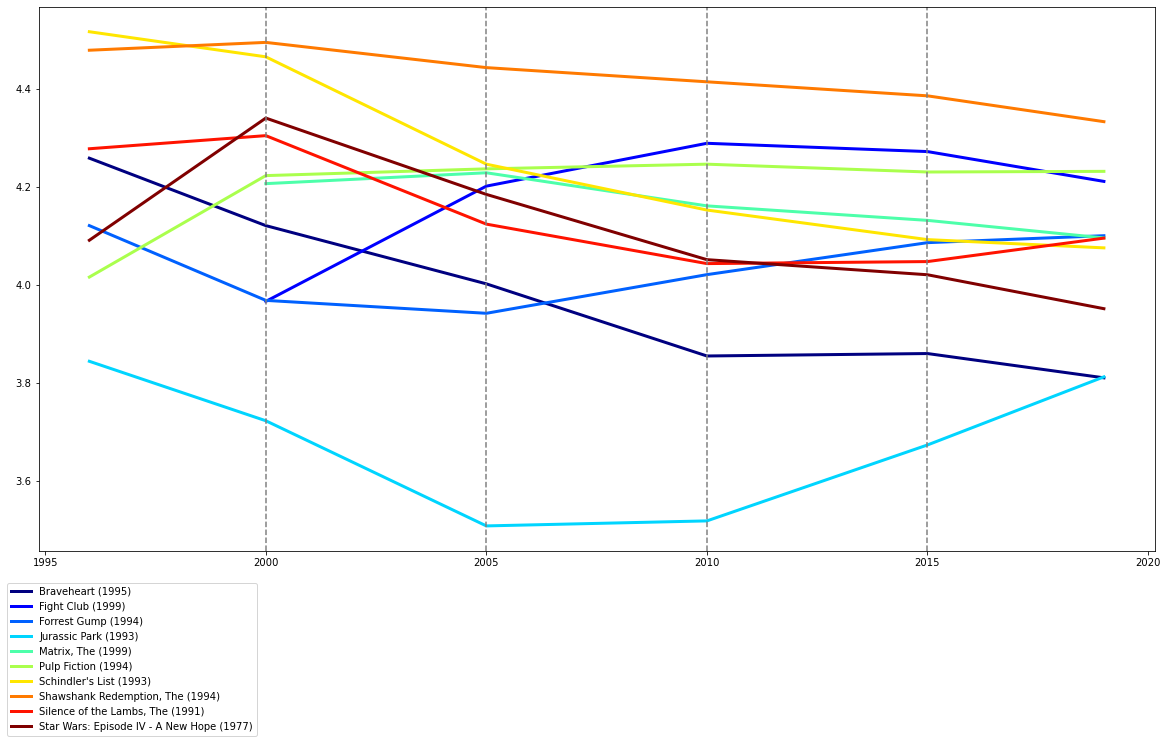

In [155]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

crisp_trend_top10.T.plot(ax=ax, cmap="jet", lw=3)
plt.axvline(2000, ls="--", color="grey")
plt.axvline(2005, ls="--", color="grey")
plt.axvline(2010, ls="--", color="grey")
plt.axvline(2015, ls="--", color="grey")

ax.legend(bbox_to_anchor=(.2, -.05))

Aha!

Here we can see the overall trend of the top voted movies per 5 years.
- Jurassic park had a major drop after 2000 and before 2015. It is much noticible.
- Shawshank redemption has shown a stable trend in its rating
- Fight club's popularity has shown the incline trend

In [161]:
from wordcloud import WordCloud

In [163]:
gnome_merged = pd.merge(gnome, gnome_lookup)

In [173]:
tags = " ".join(gnome_merged.tag)

In [179]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                min_font_size = 10).generate(tags)

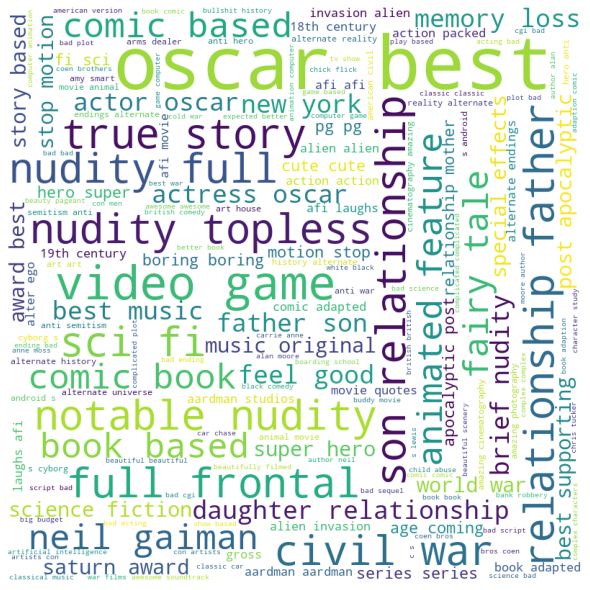

In [180]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Now, based on the word cloud shown above, we can see all those keywords which appear more frequently throughout our dataset. Which well shows some explicit keywords and so on...

Now, to use this data at the best — we can make a system where a user inputs title of the movie and the characteristics of it becomes shown there like if I take the example of "The Matrix".

In [193]:
matrix = gnome_merged[gnome_merged.movieId == 2571]

In [202]:
matrix = matrix.sort_values(by="relevance", ascending=False)[:10]

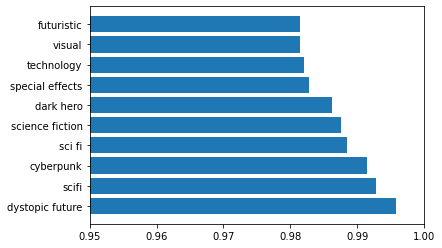

In [211]:
plt.barh(matrix.tag, matrix.relevance)
plt.xlim([0.95, 1]);

Of course it is amazing. <br>
*Note: I have shrinked the x axis to make the effect visible*

We can use this data for our project — which is to recommend users.

# 

# Q11. Which users are always tend to give high / low rating no matter how the movie is? 

This happens, this happens a lot. Now let's see them in action.

In [219]:
ratings_by_users = ratings.groupby("userId")["rating"].agg(['mean', 'count'])

In [221]:
ratings_by_users = ratings_by_users.sort_values(by="mean")

In [230]:
ratings_by_users[(ratings_by_users["mean"] <= 1) & (ratings_by_users["count"] >= 200)]

,mean,count
userId,,
131800,0.506826,293
88243,0.799578,237
8901,0.844358,257
13838,0.893768,353
106065,0.994872,585


Now, that threshold of less than 1 and count more than 200 is set by me... because see the significance - they have always given low rating in their all movies which rage from 293 to 585. Which is highly unlikely.

In [232]:
ratings_by_users[(ratings_by_users["mean"] >= 4.5) & (ratings_by_users["count"] >= 500)]

,mean,count
userId,,
45038,4.504739,633
100544,4.512871,505
85447,4.525332,829
24467,4.528571,805
74043,4.528600,507
144115,4.529570,744
157085,4.532450,755
151128,4.536432,796
56108,4.538270,601


Here again the story feels same. Actually I might have to see the actual mean rating vs their rating - but that feels so much involved for this EDA, so I am dropping that idea for now.

# 

# Great Job, Aayush!
Now we are at the end of this notebook. Next up I will start building a model from and will then recommend!